In [33]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [34]:
data = pd.read_csv(r"C:\Users\Aradhana\OneDrive\Documents\Machine_Learning_Lab\Assignment_6\diabetes.csv")


In [35]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = data[feature_cols] 
y = data['Outcome']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.670995670995671
Precision: 0.5616438356164384
Recall: 0.4823529411764706
F1_Score: 0.5189873417721519


In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

Confusion Matrix:
 [[114  32]
 [ 44  41]]

Classification Report:
               precision    recall  f1-score   support

Non-Diabetic       0.72      0.78      0.75       146
    Diabetic       0.56      0.48      0.52        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



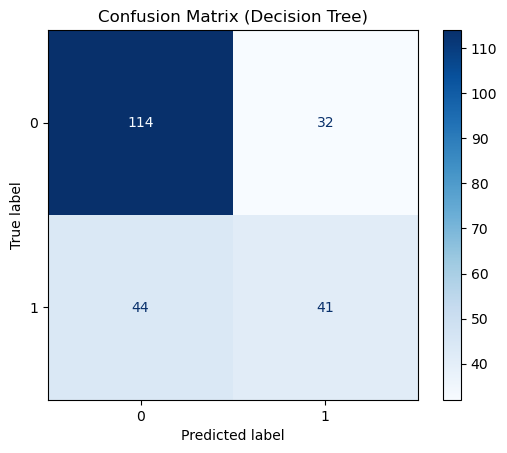

In [41]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1]   
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix (Decision Tree)")
plt.show()

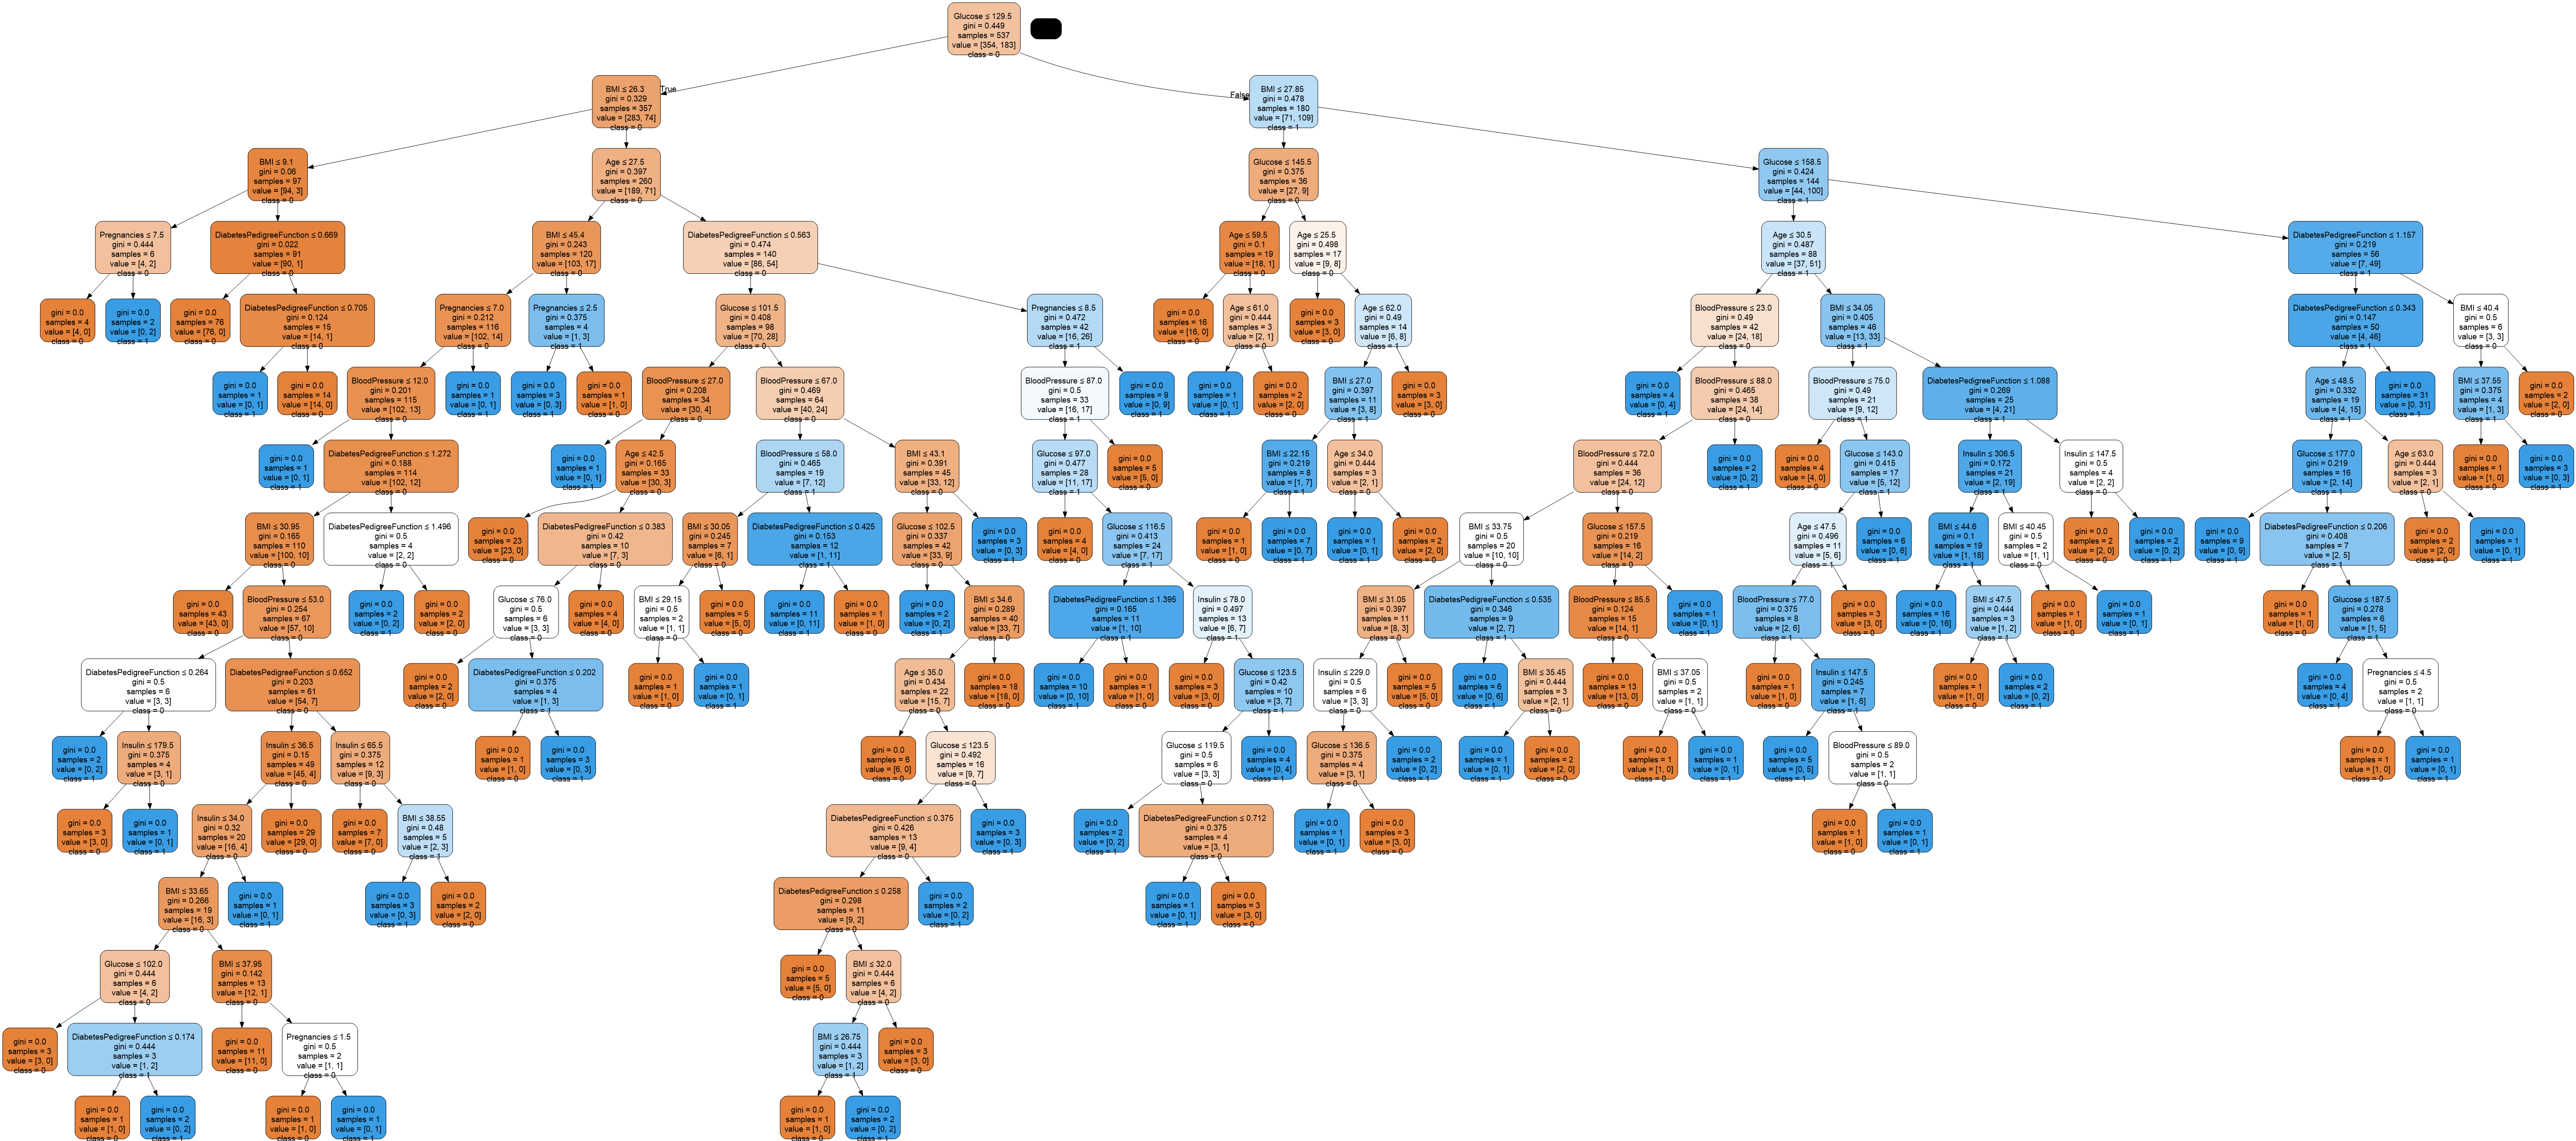

In [42]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [5]:
pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 162.5 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/278.7 kB 245.8 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 297.7 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/278.7 kB 652.5 kB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=c8c717710e0097e6acb4d8fe1d8a5ea0862e1fa421ac41bce6826147bade9642
  Stored in directory: c:\users\aradhana\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a327

In [20]:
pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/91/4c/e0ce1ef95d4000ebc1c11801f9b944fa5910ecc15b5e351865763d8657f8/graphviz-0.21-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.3 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.3 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 47.3/47.3 kB 469.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


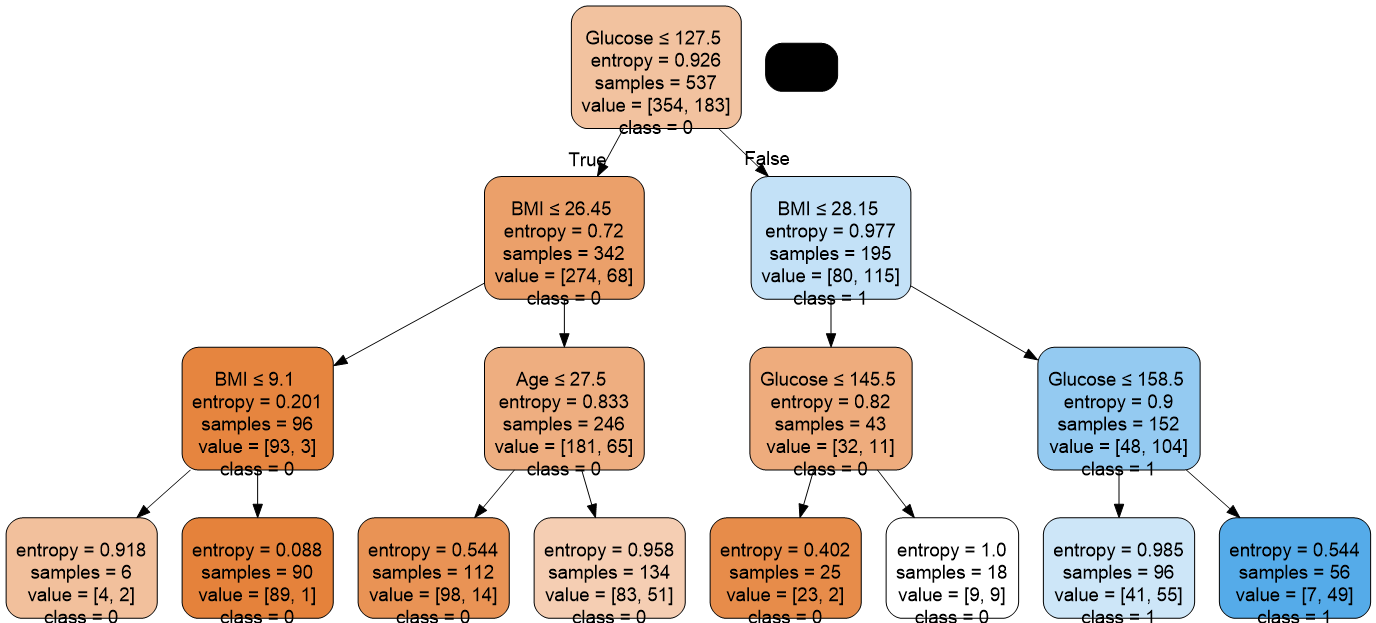

In [27]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')

Image(graph.create_png())
